In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
credit = pd.read_csv(r"C:\Users\sehri\Desktop\Machine Learning\Projects\Datasets\credit_card.csv")
credit.head(3)
                     

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0


In [3]:
customer  = pd.read_csv(r"C:\Users\sehri\Desktop\Machine Learning\Projects\Datasets\customer.csv")
customer.head(3)

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2


In [4]:
credit.dtypes

Client_Num                 int64
Card_Category             object
Annual_Fees                int64
Activation_30_Days         int64
Customer_Acq_Cost          int64
Week_Start_Date           object
Week_Num                  object
Qtr                       object
current_year               int64
Credit_Limit             float64
Total_Revolving_Bal        int64
Total_Trans_Amt            int64
Total_Trans_Vol            int64
Avg_Utilization_Ratio    float64
Use Chip                  object
Exp Type                  object
Interest_Earned          float64
Delinquent_Acc             int64
dtype: object

In [5]:
customer.dtypes

Client_Num                  int64
Customer_Age                int64
Gender                     object
Dependent_Count             int64
Education_Level            object
Marital_Status             object
state_cd                   object
Zipcode                     int64
Car_Owner                  object
House_Owner                object
Personal_loan              object
contact                    object
Customer_Job               object
Income                      int64
Cust_Satisfaction_Score     int64
dtype: object

In [6]:
conn = sqlite3.connect(":memory:")

credit.to_sql('credit', conn, index = False, if_exists = 'replace')
customer.to_sql('customer', conn, index = False, if_exists = 'replace')



10108

In [7]:
query = """ 
SELECT cr.*, c.*
FROM customer AS c
JOIN credit AS cr
ON cr.Client_Num = c.Client_Num
"""

join = pd.read_sql(query, conn)

In [8]:
join.head(3)

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,...,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,...,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,...,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,...,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2


## 1. Average income by education level

In [9]:
query = '''
SELECT Education_Level, AVG(Income) as Average_Income
FROM customer
GROUP BY Education_Level
'''

pd.read_sql(query, conn)

,Education_Level,Average_Income
0,Doctorate,55579.789357
1,Graduate,56254.135462
2,High School,57771.664510
3,Post-Graduate,56640.678295
4,Uneducated,57364.834794
5,Unknown,58040.557096


### VISUALIZAION

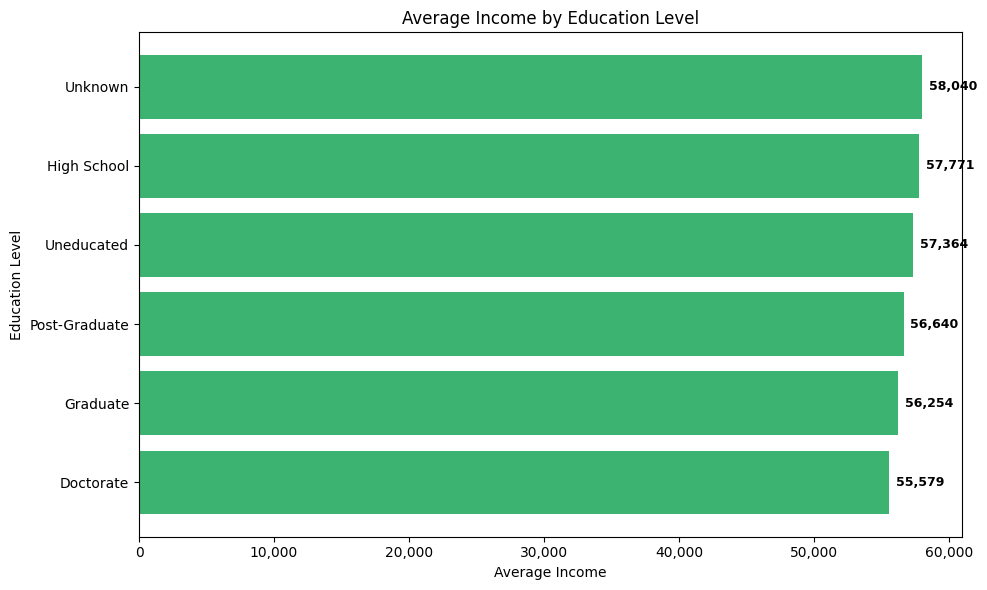

In [60]:

# Sort
df = df.sort_values('Average_Income')

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Education_Level'], df['Average_Income'], color='mediumseagreen')

plt.title('Average Income by Education Level')
plt.xlabel('Average Income')
plt.ylabel('Education Level')

# Format x-axis
plt.ticklabel_format(style='plain', axis='x')
plt.gca().get_xaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{int(width):,}',
                 xy=(width, bar.get_y() + bar.get_height() / 2),
                 xytext=(5, 0),
                 textcoords='offset points',
                 ha='left', va='center',
                 fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## 2. Number of customers by marital status and gender

In [64]:
query = '''
SELECT Gender, Marital_Status, COUNT(Client_Num) as Client_Count
FROM Customer
GROUP BY Gender, Marital_Status
'''

pd.read_sql(query,conn)

,Gender,Marital_Status,Client_Count
0,F,Married,2953
1,F,Single,2516
2,F,Unknown,411
3,M,Married,2175
4,M,Single,1720
5,M,Unknown,333


### VISUALIZATION

Index(['Gender', 'Marital_Status', 'Client_Count'], dtype='object')


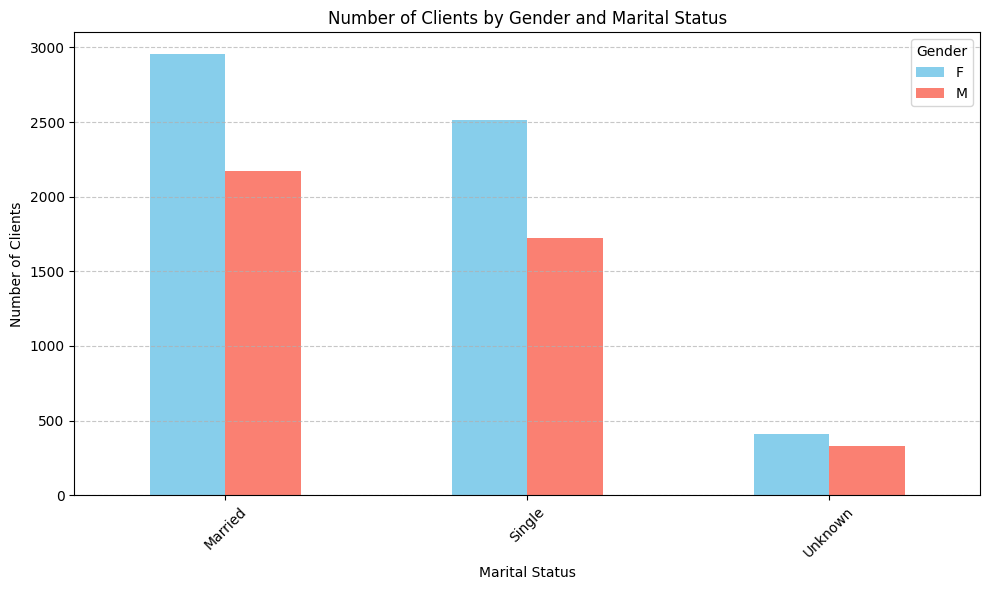

In [65]:


# Check column names (optional, just for debugging)
print(df.columns)

# Pivot to have Marital_Status as index, Gender as columns, and Client_Count as values
pivot_df = df.pivot(index='Marital_Status', columns='Gender', values='Client_Count')

# Plot grouped bar chart
pivot_df.plot(kind='bar', figsize=(10,6), color=['skyblue', 'salmon'])

plt.title('Number of Clients by Gender and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 3. Top 5 zip codes with the highest average income

In [72]:
query = '''
SELECT Zipcode, AVG(Income) as Average_Income
FROM customer
GROUP BY Zipcode
ORDER BY AVG(Income) DESC
LIMIT 5;
'''

df = pd.read_sql(query, conn)
df

,Zipcode,Average_Income
0,90670,223915.500000
1,90036,223135.000000
2,90255,207785.000000
3,90302,207170.000000
4,91615,206672.333333


### VISUALIZATION

C:\Users\sehri\AppData\Local\Temp\ipykernel_11612\1684973007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Zipcode', y='Average_Income', palette='Blues_d')


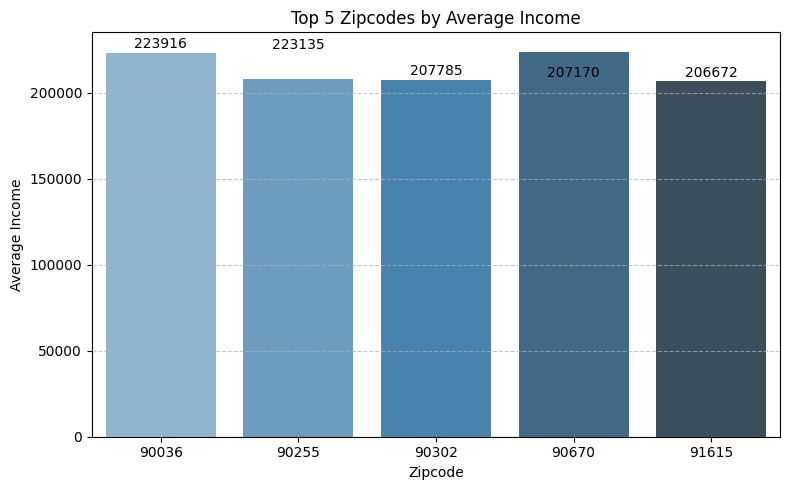

In [78]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Zipcode', y='Average_Income', palette='Blues_d')

plt.title('Top 5 Zipcodes by Average Income')
plt.xlabel('Zipcode')
plt.ylabel('Average Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of bars
for i, val in enumerate(df['Average_Income']):
    plt.text(i, val + max(df['Average_Income']) * 0.01, f"{val:.0f}", ha='center')

plt.tight_layout()
plt.show()


## 4. How many customers own a car and a house vs. neither

In [80]:
query = '''
SELECT
    SUM(CASE WHEN LOWER(TRIM(Car_Owner)) = 'yes' AND LOWER(TRIM(House_Owner)) != 'yes' THEN 1 ELSE 0 END) AS Owns_Car_Only,
    SUM(CASE WHEN LOWER(TRIM(House_Owner)) = 'yes' AND LOWER(TRIM(Car_Owner)) != 'yes' THEN 1 ELSE 0 END) AS Owns_House_Only,
    SUM(CASE WHEN LOWER(TRIM(Car_Owner)) = 'yes' AND LOWER(TRIM(House_Owner)) = 'yes' THEN 1 ELSE 0 END) AS Owns_Both,
    SUM(CASE WHEN LOWER(TRIM(Car_Owner)) != 'yes' AND LOWER(TRIM(House_Owner)) != 'yes' THEN 1 ELSE 0 END) AS Owns_None
FROM customer;


'''

df = pd.read_sql(query , conn)
df

,Owns_Car_Only,Owns_House_Only,Owns_Both,Owns_None
0,2197,2851,1867,3193


### VISUALIZATION

C:\Users\sehri\AppData\Local\Temp\ipykernel_11612\1609665409.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_long, x='Ownership_Status', y='Count', palette='pastel')


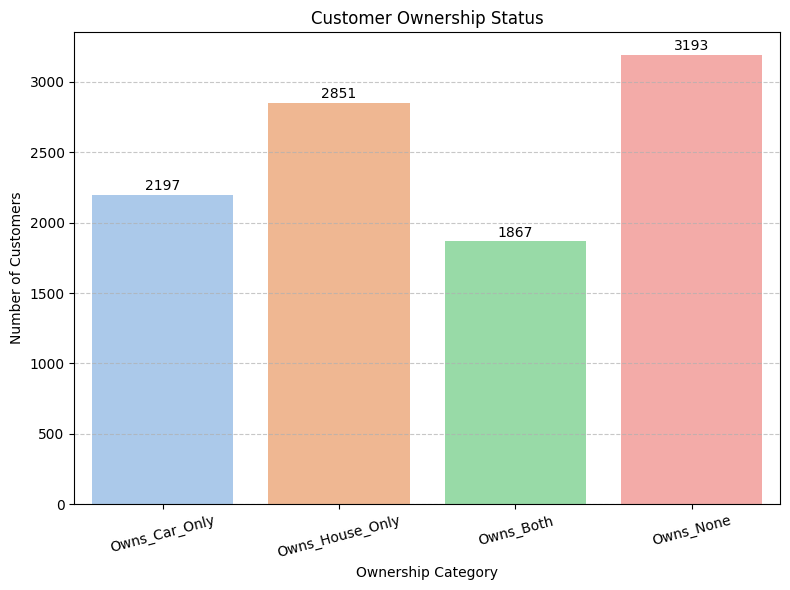

In [81]:
# Convert to long format for easier plotting
df_long = df.melt(var_name='Ownership_Status', value_name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(data=df_long, x='Ownership_Status', y='Count', palette='pastel')

plt.title('Customer Ownership Status')
plt.xlabel('Ownership Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of bars
for index, row in df_long.iterrows():
    plt.text(index, row['Count'] + max(df_long['Count'])*0.01, f"{row['Count']}", ha='center')

plt.tight_layout()
plt.show()

## 5. Average age of customers grouped by Cust_Satisfaction_Score

In [13]:
query  = '''
SELECT AVG(Customer_Age), Cust_Satisfaction_Score
FROM customer
GROUP BY Cust_Satisfaction_Score ;
'''
pd.read_sql(query, conn)

,AVG(Customer_Age),Cust_Satisfaction_Score
0,46.180733,1
1,46.333705,2
2,46.247066,3
3,46.329204,4
4,46.260628,5


## 6.  Customers with a credit limit above the average

In [15]:
query = '''
SELECT COUNT(Client_Num) as Number_of_Clients_with_Above_Average_Credit_Limit
FROM credit
WHERE Credit_Limit > (Select Avg(Credit_Limit) as Avg_Credit_Limit From credit) ;
'''

pd.read_sql(query, conn)

,Number_of_Clients_with_Above_Average_Credit_Limit
0,3184


## 7. The top 10 customers by Total_Trans_Amt

In [16]:
query = '''
SELECT Client_Num, Total_Trans_Amt
FROM credit
GROUP BY Total_Trans_Amt
ORDER BY Total_Trans_Amt DESC
LIMIT 5;
'''

pd.read_sql(query, conn)

,Client_Num,Total_Trans_Amt
0,718140783,18484
1,717642633,17995
2,801036033,17744
3,716004258,17634
4,713758758,17628


## 8. Grouping customers by Card_Category and showing average Total_Trans_Vol

In [95]:
query = '''
SELECT COUNT(Client_Num) as Client_Count, Card_Category, AVG(Total_Trans_Vol) as Average_Total_Transaction_Volume
FROM credit
GROUP BY Card_Category;
'''

df = pd.read_sql(query,conn)
df

,Client_Count,Card_Category,Average_Total_Transaction_Volume
0,9214,Blue,63.092902
1,188,Gold,96.936170
2,67,Platinum,111.791045
3,639,Silver,76.054773


In [84]:
### VISUALIZATION

C:\Users\sehri\AppData\Local\Temp\ipykernel_11612\30201005.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=df, x='Card_Category', y='Client_Count', palette='viridis')


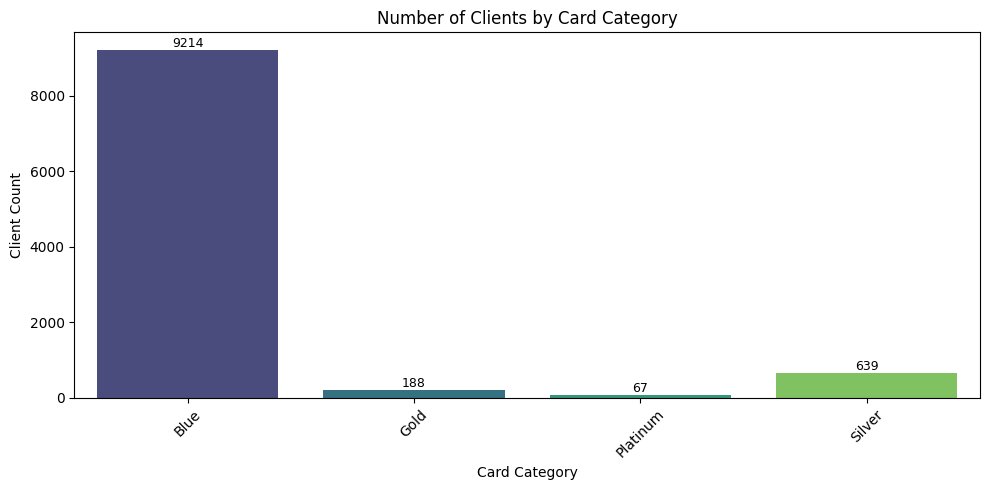

C:\Users\sehri\AppData\Local\Temp\ipykernel_11612\30201005.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=df, x='Card_Category', y='Average_Total_Transaction_Volume', palette='viridis')


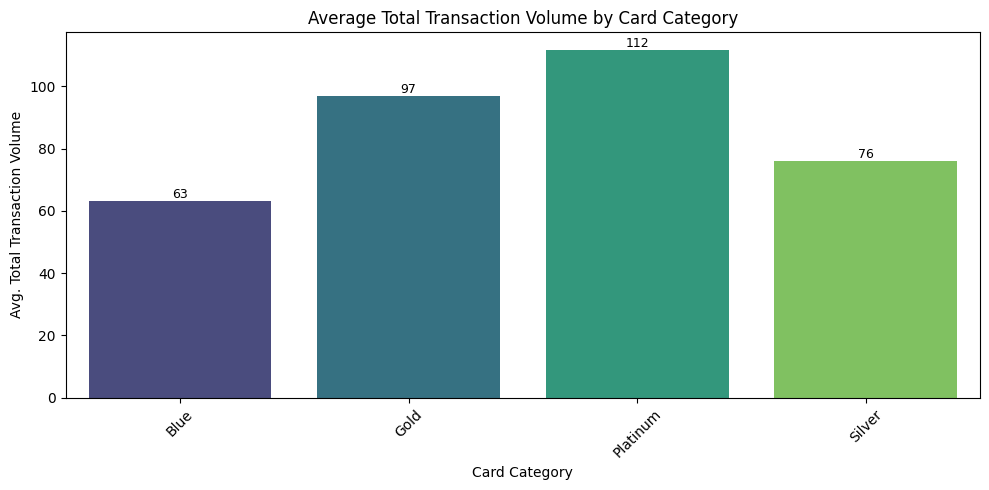

In [96]:
# Plotting Client Count per Card Category
plt.figure(figsize=(10, 5))
ax1 = sns.barplot(data=df, x='Card_Category', y='Client_Count', palette='viridis')
plt.title('Number of Clients by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Client Count')
plt.xticks(rotation=45)

# Add data labels
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Plotting Average Total Transaction Volume per Card Category
plt.figure(figsize=(10, 5))
ax2 = sns.barplot(data=df, x='Card_Category', y='Average_Total_Transaction_Volume', palette='viridis')
plt.title('Average Total Transaction Volume by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Avg. Total Transaction Volume')
plt.xticks(rotation=45)

# Add data labels
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.0f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 9. Customers with Avg_Utilization_Ratio above 0.8

In [28]:
query = '''
SELECT Client_Num , Avg_Utilization_Ratio
FROM credit
WHERE Avg_Utilization_Ratio > 0.8 ;
'''

pd.read_sql(query , conn)


,Client_Num,Avg_Utilization_Ratio
0,708100533,0.850
1,708158133,0.830
2,708190158,0.831
3,708303108,0.964
4,708313608,0.859
...,...,...
461,825756333,0.924
462,825811158,0.820
463,825856083,0.809
464,826136283,0.809


## 10.Total and Average Interest_Earned for each card category

In [85]:
query = '''
SELECT AVG(Interest_Earned) as Average_Interest_Earned, Card_Category
FROM credit
GROUP BY Card_Category
;
'''

df = pd.read_sql(query , conn)
df

,Average_Interest_Earned,Card_Category
0,705.001925,Blue
1,1988.213617,Gold
2,2412.373881,Platinum
3,1270.862723,Silver


### VISUALIZATION

C:\Users\sehri\AppData\Local\Temp\ipykernel_11612\2511787929.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Card_Category', y='Average_Interest_Earned', palette='magma')


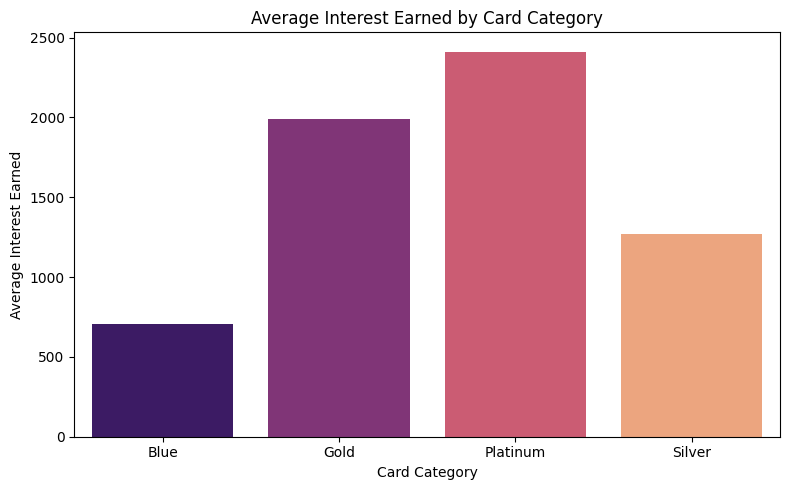

In [87]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Card_Category', y='Average_Interest_Earned', palette='magma')
plt.title('Average Interest Earned by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Average Interest Earned')
plt.tight_layout()
plt.show()

In [88]:
query = '''
SELECT SUM(Interest_Earned) as Total_Interest_Earned, Card_Category
FROM credit
GROUP BY Card_Category ;
'''

df = pd.read_sql(query, conn)
df

,Total_Interest_Earned,Card_Category
0,6495887.74,Blue
1,373784.16,Gold
2,161629.05,Platinum
3,812081.28,Silver


### VISUALIZATION

C:\Users\sehri\AppData\Local\Temp\ipykernel_11612\477846401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Card_Category', y='Total_Interest_Earned', palette='magma')


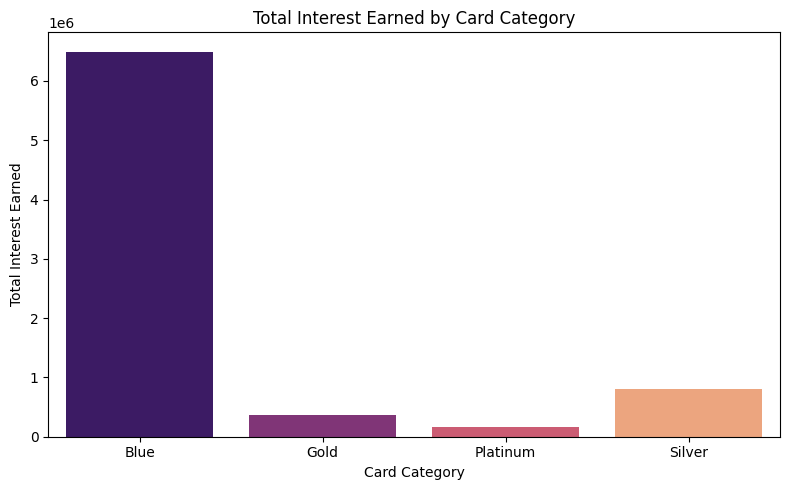

In [91]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Card_Category', y='Total_Interest_Earned', palette='magma')
plt.title('Total Interest Earned by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Total Interest Earned')
plt.tight_layout()
plt.show()

## 11. Total transaction amount by quarter (Qtr)

In [55]:
query  = '''
SELECT SUM(Total_Trans_Amt) as Total_Transaction_Amount , Qtr
FROM credit
GROUP BY Qtr ; 
'''

df = pd.read_sql(query , conn)
df

,Total_Transaction_Amount,Qtr
0,11250588,Q1
1,11135301,Q2
2,11449700,Q3
3,10686424,Q4


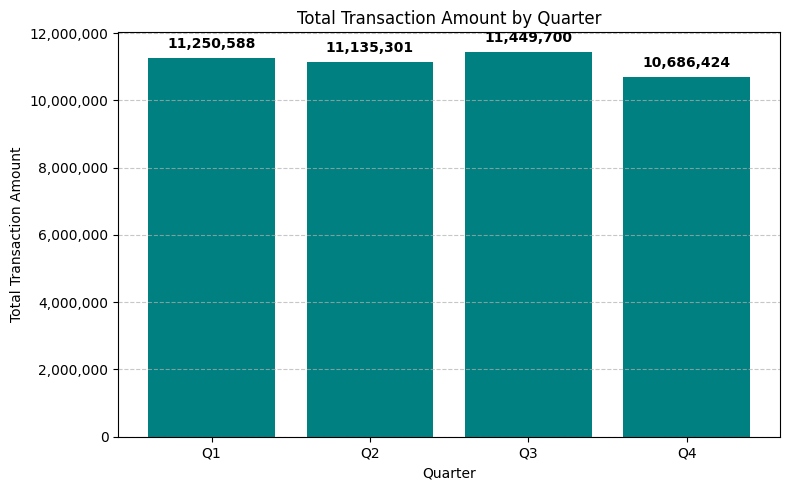

In [57]:

df = df.sort_values('Qtr')

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(df['Qtr'], df['Total_Transaction_Amount'], color='teal')

# Title and axis labels
plt.title('Total Transaction Amount by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Transaction Amount')

# Format y-axis ticks with commas
plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add data labels above bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height):,}',  # format with comma
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # offset above the bar
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [35]:
credit.dtypes

Client_Num                 int64
Card_Category             object
Annual_Fees                int64
Activation_30_Days         int64
Customer_Acq_Cost          int64
Week_Start_Date           object
Week_Num                  object
Qtr                       object
current_year               int64
Credit_Limit             float64
Total_Revolving_Bal        int64
Total_Trans_Amt            int64
Total_Trans_Vol            int64
Avg_Utilization_Ratio    float64
Use Chip                  object
Exp Type                  object
Interest_Earned          float64
Delinquent_Acc             int64
dtype: object

## 12. Average activation rate in the first 30 days by week number

In [51]:
query = '''
            SELECT AVG(Activation_30_Days) , Week_Num
            FROM credit
            GROUP BY Week_Num 
            ORDER BY CAST(SUBSTR(Week_Num, 6) as INT) DESC ;
        '''

df = pd.read_sql(query, conn)
df.head(3)

,AVG(Activation_30_Days),Week_Num
0,0.640244,Week-52
1,0.528205,Week-51
2,0.569231,Week-50


<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sehri\AppData\Local\Temp\ipykernel_11612\1541437370.py:12: SyntaxWarning: invalid escape sequence '\d'
  df['Week_Number'] = df['Week_Num'].str.extract('(\d+)').astype(int)


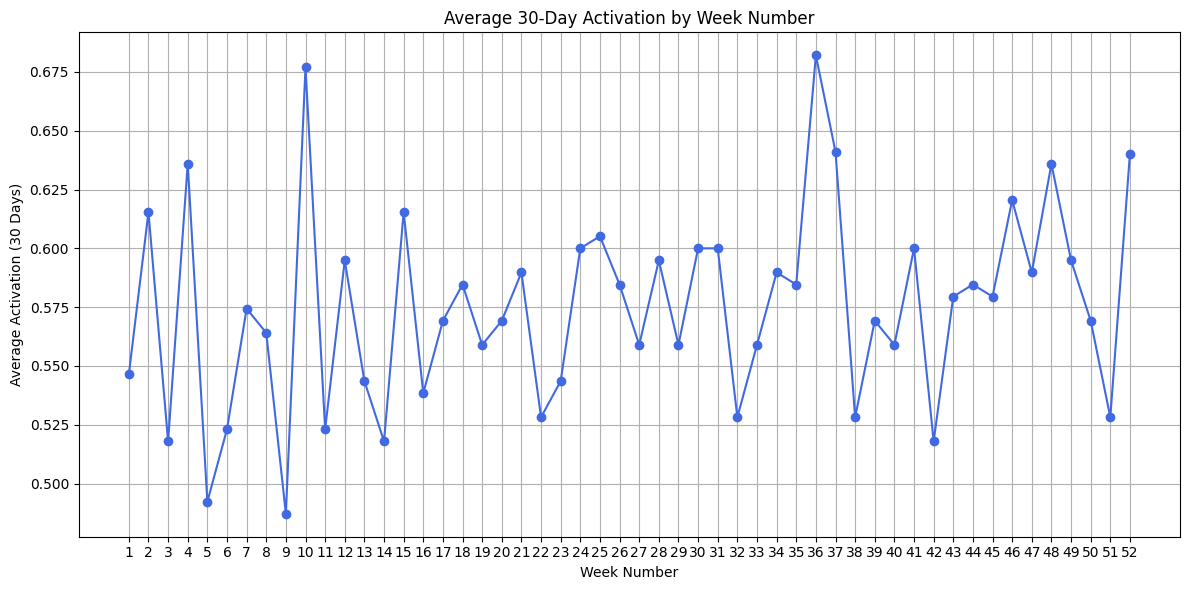

In [53]:


# Run the query
query = '''
    SELECT AVG(Activation_30_Days) AS Avg_Activation, Week_Num
    FROM credit
    GROUP BY Week_Num
    ORDER BY CAST(SUBSTR(Week_Num, 6) as INT) DESC;
'''

df = pd.read_sql(query, conn)

# Extract numeric week number for proper x-axis sorting
df['Week_Number'] = df['Week_Num'].str.extract('(\d+)').astype(int)

# Sort in ascending order for line plot (week 1 to 52)
df = df.sort_values('Week_Number')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Week_Number'], df['Avg_Activation'], marker='o', color='royalblue')
plt.title('Average 30-Day Activation by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Average Activation (30 Days)')
plt.grid(True)
plt.xticks(df['Week_Number'])  # Show all week numbers on x-axis if needed
plt.tight_layout()
plt.show()

